# Computational Methods for Astrophysics, Homework #6, Askold Vilkha, Taylor Paul, Clive Binu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For this homework, we are going to consider an inviscid Burger's equation:
$$\frac{\partial u}{\partial t} + \frac{1}{2} \frac{\partial (u^2)}{\partial x} = 0$$

## Exercise 1, Weak Solution 1

For this exercise, initial data is:
$$u(x, 0) = \begin{cases} 1 & \text{if } x < 0 \\ 0 & \text{if } x > 0 \end{cases}$$
We need to prove that weak solution is:
$$u(x, t) = \begin{cases} 1 & \text{if } x < \frac{1}{2} t \\ 0 & \text{if } x > \frac{1}{2} t \end{cases}$$

In order to do that, we will try to solve the Burger's equation using method of characteristics. Thus, we rewrite the equation as:
$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0\, ;\\
\partial_t u + u \partial_x u = 0$$
To obtain the parametrization invariant form, let's review the general form of the equation:
$$ a(x, t, u)\partial_x u + b(x, t, u)\partial_t u = c(x, t, u)$$
The invariant form is then:
$$ \frac{dx}{a(x, t, u)} = \frac{dt}{b(x, t, u)} = \frac{du}{c(x, t, u)}$$
In our case, we have:
$$ \frac{dx}{u} = \frac{dt}{1} = \frac{du}{0}$$
For this to be true, we need to have $du = 0$, which means that $u = C_1$. Thus, we are left with:
$$ \frac{dx}{u} = \frac{dt}{1} \implies \frac{dx}{dt} = u = C_1$$
This is a simple ODE, which can be solved as:
$$ x = C_1 t + C_2 \implies C_2 = x - C_1 t$$
If we try to express $u$ from this equation, we will get some function $u = F(C_2) = F(x - C_1 t)$. However, at $t = 0$, this simplifies to $u = F(x)$.
Indeed, our initial data is:
$$u(x, 0) = F(x) = \begin{cases} 1 & \text{if } x < 0 \\ 0 & \text{if } x > 0 \end{cases}$$

Therefore, the general solution will be of the form:
$$u(x, t) = F(x - C_1 t) = \begin{cases} 1 & \text{if } x - C_1 t < 0 \\ 0 & \text{if } x - C_1 t > 0 \end{cases}$$
$\colorbox{red}{\text{Askold: Yes, it is glued now. The proof is in the reference, I don't really feel like putting it here since it is quite lenghty.}}$
$\colorbox{red}{\text{If you have time and will to do that, please do, but it is not extremely necessary, so up to you :)}}$ \
This is adapted from: https://www.youtube.com/watch?v=knyLkLvKWHg

In order to find $C_1$, we can utilize the following formula, which describes the curve of discontinuity $x = x(t)$ (reference: https://web.stanford.edu/class/math220a/handouts/conservation.pdf):
$$C_1 = \frac{dx}{dt} = \frac{f(u_L) - f(u_R)}{u_L - u_R}$$
where $u_L$ and $u_R$ are the left and right initial conditions (here $u_L = 1$ and $u_R = 0$), and $f = \frac{1}{2}u^2$. Thus, we get:
$$C_1 = \frac{\frac{1}{2}u_L^2 - \frac{1}{2}u_R^2}{u_L - u_R} = \frac{\frac{1}{2} - 0}{1 - 0} = \frac{1}{2}$$
Therefore:
$$u(x, t) = \begin{cases} 1 & \text{if } x - \frac{1}{2} t < 0 \\ 0 & \text{if } x - \frac{1}{2} t > 0 \end{cases} = 
\begin{cases} 1 & \text{if } x < \frac{1}{2} t \\ 0 & \text{if } x > \frac{1}{2} t \end{cases}$$

## Exercise 1, Weak Solution 2

Here, we consider the following initial data:
$$u(x, 0) = \begin{cases} 0 & \text{if } x < 0 \\ 1 & \text{if } x > 0 \end{cases}$$
Similarly to the previous exercise, we need to prove that weak solution is:
$$u(x, t) = \begin{cases} 0 & \text{if } x < \frac{1}{2} t \\ 1 & \text{if } x > \frac{1}{2} t \end{cases}$$
Using the same logic as for the previous exercise, we can write the general solution as:
$$u(x, t) = F(x - C_1 t) = \begin{cases} 0 & \text{if } x - C_1 t < 0 \\ 1 & \text{if } x - C_1 t > 0 \end{cases}$$
We find $C_1$ in the same way as before:
$$C_1 = \frac{f(u_L) - f(u_R)}{u_L - u_R} =
\frac{\frac{1}{2}u_L^2 - \frac{1}{2}u_R^2}{u_L - u_R} = \frac{0 - \frac{1}{2}}{0 - 1} = \frac{1}{2}$$
Thus:
$$u(x, t) = \begin{cases} 0 & \text{if } x < \frac{1}{2} t \\ 1 & \text{if } x > \frac{1}{2} t \end{cases}$$

In [8]:
x_array = np.linspace(-10, 10, 100)

In [3]:
t_array = np.linspace(0, len(x_array), 100)

In [4]:
u_i = np.zeros_like(x_array)

In [5]:
i = 0
while i < len(x_array):
    if x_array[i] < 0:
        u_i[i] = 1
        i += 1
    else:
        u_i[i] = 0
        i += 1

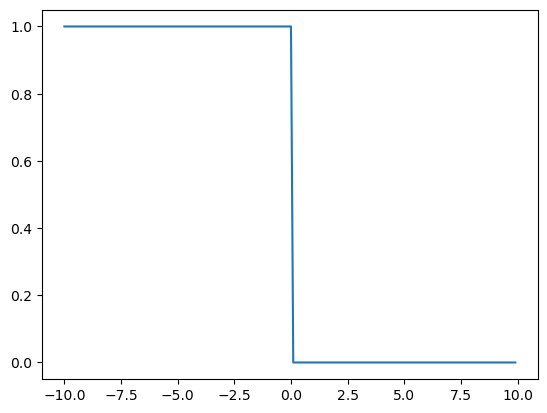

In [6]:
plt.plot(x_array, u_i)

KeyboardInterrupt: 

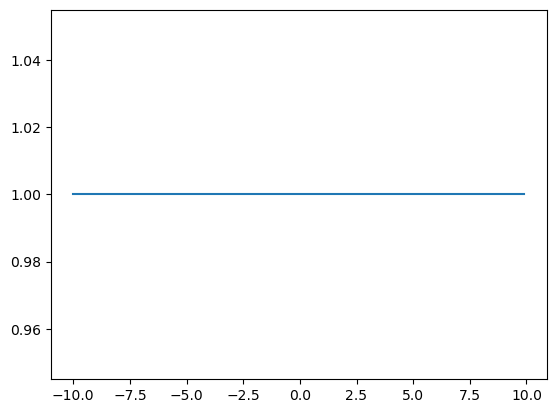

In [7]:
fig, ax = plt.subplots()
j = 0
u = u_i
while j < len(t_array):
    i = 0
    while i < len(x_array):
        if x_array[i] < (t_array[j]/2):
            u[i] = 1
            i += 1
        else:
            u[i] = 0
            i += 1
    ax.plot(x_array, u)
    plt.savefig(f"fig{j:0>3d}.png")
    ax.clear()
    j += 1

In [1]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('prob1.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

IndexError: list index out of range